In [2]:
#_Name_: Zhuoheng Yang 
#_Final Project_:(option 5:extension to Computer Homework #9)

# Computer Homework #9: Inductors in Circuits
## Due Thursday April 2 11:59pm

In this assignment we will examine the effect of inductors in circuits, and introduce the concept of alternating-current circuits. 

The canonical example of an inductor is a solenoid. When you run a current through a solenoid, it develops a magnetic field. If this current is changing, the magnetic field in the solenoid is changing too. And if that happens, the solenoid experiences a changing magnetic flux through itself. Faraday's law tells us that this will result in an emf in the solenoid that's in a direction to oppose the change in flux. 

The induced emf in the solenoid is proportional to the rate of change of the current, so we can write it as:
$$
    V_L = -L\frac{dI}{dt}.
$$
$L$ is a proportionality constant called the <b>inductance</b>. It's measured in Henries. 

Like capacitance, inductance is a geometrical quantity. We'll calculate it explicitly for a solenoid in class. Physically, inductors prevent currents from changing too quickly. If $dI/dt$ is large, the inductor will generate a large opposing emf that limits the current. Surge protectors are basically big inductors.

Inductors contribute to Kirchhoff's loop rule, just like resistors, capacitors, and batteries do. So we can solve circuits with inductors using techniques similar to what you did in [Computer Homework 5](https://github.com/Phys260WI2020/HW5/blob/master/HW_05.ipynb). You will want to have that assignment at hand when starting this one.  But, one primary difference is that we will use methods in a python `class` to perform the integration.

### Pre-flight:  In class, we will look at how a class might work for the RC circuit from homework 5.  You will need to create a modified class for this homework.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RCCircuit() :
    '''Define a discharging RC Circuit, and use methods to perform the time integration'''
    def __init__(self, R = 10, C = 2e-06, V0_cap = 10, num_timesteps=1000, T=5) :
        ''' This '''
        self.Q0_cap = C * V0_cap
        self.R = R
        self.C = C
        self.RC = R * C
        self.T = T # Number of time constants to iterate over
        self.num_timesteps = num_timesteps
        
        self.energy_capacitor = 0.5 * C * V0_cap**2
        self.dt = T*self.RC/num_timesteps
        
        self.timesteps = np.arange(0, T*self.RC, self.dt)
        
        self.qarray = np.zeros(self.timesteps.shape)
        self.iarray = np.zeros(self.timesteps.shape)
        self.parray = np.zeros(self.timesteps.shape)
    
    def populate(self, inum, Q, I) :
        self.qarray[inum] = Q
        self.iarray[inum] = I
        self.parray[inum] = I**2*self.R
        
    def update(self, Q, I) :
        Q = Q-I*self.dt  # dq = dq/dt * dt = I * dt
        I = Q/self.RC
        return Q, I
    
    def solve_circuit(self) :
        Q = rcc.Q0_cap
        I = rcc.Q0_cap/rcc.RC

        for num_timestep in np.arange(self.num_timesteps):
            self.populate(num_timestep, Q, I)
            Q, I = self.update(Q, I)
            
    def calc_energy_dissipated(self) :
        '''Once the circuit is "solved", then we can calculate the energy dissipated'''
        return np.sum(self.parray*self.dt)


**Solve in two lines**: We create an instance of the class RCCircuit, and call it rcc.  Then, we solve the circuit with the method, rcc.solve_circuit()

In [3]:
rcc = RCCircuit(num_timesteps=100)
rcc.solve_circuit() 
print(rcc.calc_energy_dissipated())
print(rcc.energy_capacitor)

0.00010256050741884625
9.999999999999999e-05


**Plot using the attributes of the class:**  rcc.qarray, rcc.iarray, etc.

Text(0.5, 0, 'Time in units of RC')

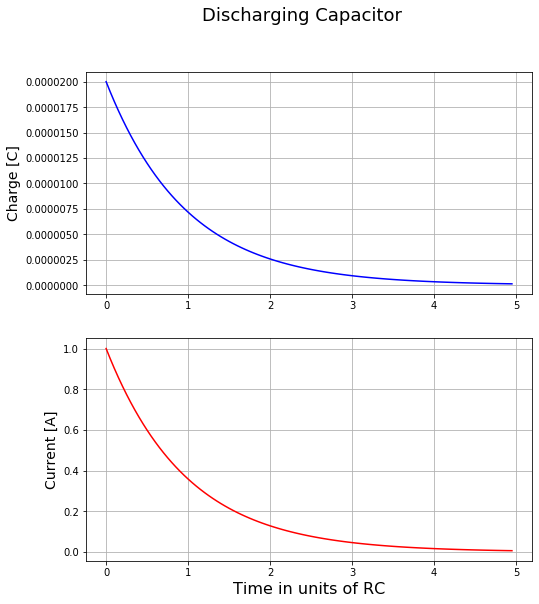

In [4]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,9))  
axes = [ax1, ax2]

fig.suptitle('Discharging Capacitor', fontsize=18)
yarrays = [rcc.qarray, rcc.iarray]
ylabels = ['Charge [C]', 'Current [A]']
colors = ['b', 'r']

for ax, yarray, ylabel, color in zip(axes, yarrays, ylabels, colors) :
    ax.plot(rcc.timesteps/rcc.RC, yarray, color=color)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=14)

ax2.set_xlabel('Time in units of RC', fontsize=16)


## Part 1 (10 points): A simple RL circuit

Consider this circuit:

<img src="http://www-personal.umich.edu/~gerdes/img/LR_DC.jpg">

At $t=0$ the switch is closed.

The loop rule for this circuit reads:
$$
        V - IR -L\frac{dI}{dt} = 0.
$$
This is a first-order differential equation similar to what we encountered earlier for $RC$ circuits. The solution is
$$
        I(t) = \frac{V}{R}\left(1 - e^{-t/\tau}\right),
$$
where 
$$
        \tau = \frac{L}{R}
$$
is the time constant for the circuit (analogous to $RC$ from before). To get the inductor voltage as a function of time, apply the definition from above:
$$
    V_L = -L\frac{dI}{dt} = {V}e^{-t/\tau}.
$$
So the current starts at zero and exponentially approaches its asymptotic value of $V/R$, while the inductor voltage starts out at $V$ and exponentially decays to zero as the current becomes steady.

Let:
* V = 10 Volts
* R = 1 $\Omega$
* L = 1 H

 

<b>Plot</b> the following quantities vs. time, in units of the time constant $\tau=L/R$:
* Voltage across the resistor and inductor 
* Power delivered to the resistor and inductor. Recall that $P = IV$. 

<b>Answer</b> the following questions:
* At what time (in units of $\tau$) is the maximum power being delivered to the inductor? 
* What is the total energy $U$ delivered to the inductor? 
* If you change $L$ while holding $R$ constant, how does $U$ change? 
* If you change $R$ while holding $L$ constant, how does $U$ change?
* If you simultaneously double $R$ and $L$, you get a circuit with the same time constant as before. Is this new circuit equivalent to your original one?

50.0
48.127693368543476


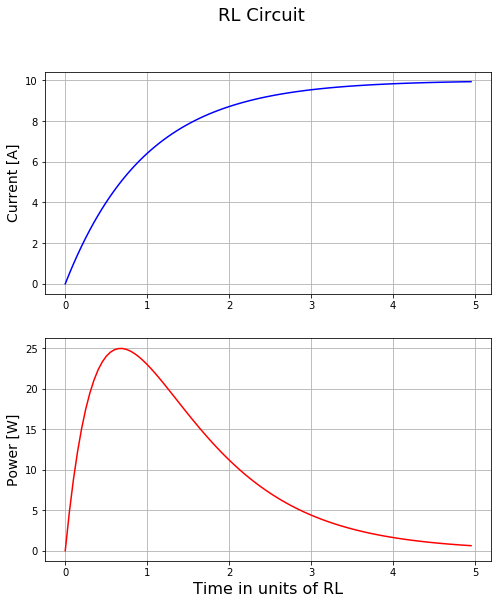

In [5]:
class RLCircuit() :
    '''Define a RL Circuit, and use methods to perform the time integration'''
    def __init__(self, R = 1, L = 1, V = 10, num_timesteps=1000, T=5) :
        self.R = R
        self.L = L
        self.V = V
        self.tau = L / R
        self.T = T # Number of time constants to iterate over
        self.num_timesteps = num_timesteps
        
        self.dt = T*self.tau/num_timesteps
        
        self.timesteps = np.arange(0, self.T*self.tau, self.dt)
        
        self.energy_inductor = 0.5 * self.L * (self.V / self.R)**2

        self.iarray = np.zeros(self.timesteps.shape)
        self.parray = np.zeros(self.timesteps.shape)
    
    def populate(self, inum, V_induced, I) :
        self.iarray[inum] = I
        self.parray[inum] = I * (-V_induced)
        
    def update(self, V_induced, I) :
        dI = -V_induced * self.dt / self.L
        I = I + dI
        V_induced = -self.V + self.R * I
        return V_induced, I
    
    def solve_circuit(self) :
        V_induced = -self.V
        I = 0
        for num_timestep in np.arange(self.num_timesteps):
            self.populate(num_timestep, V_induced, I)
            V_induced, I = self.update(V_induced, I)
    def calc_energy_dissipated(self) :
        '''Once the circuit is "solved", then we can calculate the energy dissipated'''
        return np.sum(self.parray*self.dt)

            
rlc = RLCircuit(num_timesteps=100)
rlc.solve_circuit() 
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,9))  
axes = [ax1, ax2]

fig.suptitle('RL Circuit', fontsize=18)
yarrays = [rlc.iarray, rlc.parray]
ylabels = ['Current [A]', 'Power [W]']
colors = ['b', 'r']

for ax, yarray, ylabel, color in zip(axes, yarrays, ylabels, colors) :
    ax.plot(rlc.timesteps/rlc.tau, yarray, color=color)
    ax.grid()
    ax.set_ylabel(ylabel, fontsize=14)

ax2.set_xlabel('Time in units of RL', fontsize=16)

print(rlc.energy_inductor)
print(rlc.calc_energy_dissipated())

* At what time (in units of $\tau$) is the maximum power being delivered to the inductor? 
* What is the total energy $U$ delivered to the inductor? 
* If you change $L$ while holding $R$ constant, how does $U$ change? 
* If you change $R$ while holding $L$ constant, how does $U$ change?
* If you simultaneously double $R$ and $L$, you get a circuit with the same time constant as before. Is this new circuit equivalent to your original one?

At t = 0.7 max power is being delivered.
Total energy is 50. If I double L, U doubles. If I halve R, U quadruples. It's not the same if I double R and L. Power and current both halve.

## Part 2 (10 points): Comparison to analytic solution:

* Use the analytic solution to this RL circuit to calulate when the peak power is delivered to the inductor.
* How much total energy is delivered to the inductor for the numbers given above?
* Determine how the total energy delivered to the inductor scales with $R$ and $L$. 

Does your program agree with your calculation?

$$ P = VI = \frac{V}{R}\left(1 - e^{-t/\tau}\right) {V}e^{-t/\tau}$$
P is maximum when it's 0.69. Its integral from ${t/\tau}$ = 0 to 5 is 49.33. So total energy is 49.33. $$\int P = \frac{-50L(2e^{tR/L}-1)e^{-2tR/L}}{R^2}$$ Therefore, as time approaches infinity, P is proportional to L and proportional to inverse square R.

My program agrees with my calculation.

## Part 3 (10 points): An alternating-current (AC) circuit

In Part 1, we considered a constant voltage source. But your code can easily accommodate a situation where the current is changing in time. Simply update $V$ at each time step along with the other values in the circuit. Let's replace the battery in Part 1 with a generator that produces a sinusoidal voltage,
$$
            V = V_0\sin\omega t.
$$

<img src="http://www-personal.umich.edu/~gerdes/img/LR_AC.jpg">

Now there are two different timescales in the problem: the characteristic time of the $RL$ circuit $\tau = L/R$, and the period of the generator, $2\pi/\omega$. In this part of the assignment, you'll hold $\tau$ fixed and investigate what happens as you change $\omega$.

Let 
* $V_0 = 10$ Volts
* $L = 1$ H
* $R = 1~\Omega$

<b>Make the following plots:</b>
* Let $\omega = R/L$, and plot $V_L$ and $V_R$ on the same time axis. Do they reach their peak values at the same time? If not, what is the phase difference between these two sinusoidal voltages?
* Allow $\omega$ to vary from $0.01/\tau$ to $100/\tau$ in equal logarithmic spacings (read the <a href="https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.logspace.html">numpy documentation</a> and use the function ```np.logspace()```), and make a log-log plot of $V_{L,\mathrm{peak}}/V_0$ vs. $\omega$. (This is known as a <i>Bode plot</i>.) Note: you will want to modify your timestep so that it's a small fraction of a generator period. Make sure to wait at least a few full generator cycles before evaluating $V_{L,\mathrm{peak}}$, to allow any transitory behavior due to initial conditions to be washed out. 


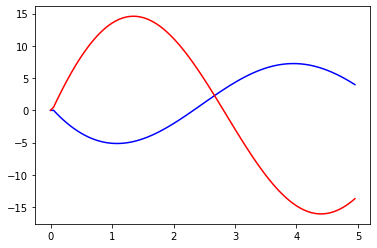

In [6]:
class ACRLCircuit() :
    '''Define a RL Circuit, and use methods to perform the time integration'''
    def __init__(self, R = 1, L = 1, V0 = 10, num_timesteps=1000, T=5) :
        self.R = R
        self.L = L
        self.V = V0
        self.tau = L / R
        self.T = T # Number of time constants to iterate over
        self.num_timesteps = num_timesteps

#         self.omega = np.logspace(0.01 / self.tau, 100 / self.tau, num = size(self.timesteps))
        self.omega = R / L 
#         self.dt = T*self.tau/num_timesteps
#         self.dp = 2 * np.pi / omega / num_timesteps
        
       # self.dt = self.T * 1/self.omega/self.num_timesteps #np.min([1/self.omega, 1/self.tau])/self.num_timesteps
        self.dt = T * 1 / self.tau / num_timesteps
        
        self.timesteps = np.arange(0, T*self.tau, self.dt)
#         self.period = np.arange(0, 2 * np.pi / self.omega, self.dp)

        self.vlarray = np.zeros(self.timesteps.shape)
        self.vrarray = np.zeros(self.timesteps.shape)
    
    def populate(self, inum, V, V_induced) :
        self.vlarray[inum] = V_induced
        self.vrarray[inum] = V - V_induced
        
    def update(self, t, V, V_induced, I) :
        V_induced = -V + self.R * I
        dI = -V_induced * self.dt / self.L
        I = I + dI
        V = self.V * np.sin(self.omega * t)
        t = t + self.dt
        return t, V, V_induced, I
    
    def solve_circuit(self) :
        V = self.V * np.sin(0)
        V_induced = 0
        I = 0
        t = 0
        for num_timestep in np.arange(self.num_timesteps):
            t, V, V_induced, I = self.update(t, V, V_induced, I)
            self.populate(num_timestep, V, V_induced)
            
acrlc = ACRLCircuit(num_timesteps=100)
acrlc.solve_circuit() 

plt.plot(acrlc.timesteps/acrlc.tau, acrlc.vlarray, 'b-')
plt.plot(acrlc.timesteps/acrlc.tau, acrlc.vrarray, 'r-')


There should be a 90 degree phase difference between $V_L$ and $V_R$. 

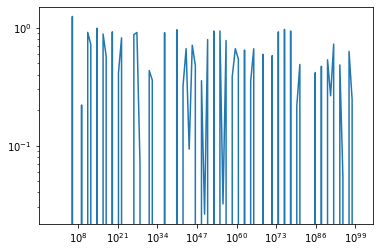

In [7]:
class ACRLCircuit2() :
    '''Define a RL Circuit, and use methods to perform the time integration'''
    def __init__(self, R = 1, L = 1, V0 = 10, num_timesteps=1000, T=10) :
        self.R = R
        self.L = L
        self.V = V0
        self.tau = L / R
        self.T = T # Number of time constants to iterate over
        self.num_timesteps = num_timesteps

        self.omega = np.logspace(0.01 / self.tau, 100 / self.tau, num=num_timesteps)

        self.dt = T * 1 / self.tau / num_timesteps
        
        self.timesteps = np.arange(0, T*self.tau, self.dt)

        self.varray = np.zeros(self.timesteps.shape)
        self.iarray = np.zeros(self.timesteps.shape)
        self.parray = np.zeros(self.timesteps.shape)
    
    def populate(self, inum, V_induced, I) :
        self.varray[inum] = V_induced / self.V
        self.iarray[inum] = I
        self.parray[inum] = I * (-V_induced)
        
    def update(self, count, t, V, V_induced, I) :
        V_induced = -V + self.R * I
        dI = -V_induced * self.dt / self.L
        I = I + dI
        V = self.V * np.sin(self.omega[count] * t)
        t = t + self.dt
        count = count + 1
        return count, t, V, V_induced, I
    
    def solve_circuit(self) :
        V = self.V * np.sin(0)
        V_induced = 0
        I = 0
        t = 0
        count = 0
        for num_timestep in np.arange(self.num_timesteps):
            count, t, V, V_induced, I = self.update(count, t, V, V_induced, I)
            self.populate(num_timestep, V_induced, I)
            
acrlc = ACRLCircuit2(num_timesteps=100)
acrlc.solve_circuit() 

plt.loglog(acrlc.omega, acrlc.varray)

## Part 4 (10 points): Discussion

* What happens when $\omega\ll 1/\tau$? When $\omega \gg 1/\tau$? When $\omega \approx 1/\tau$?
* Suppose that, instead of driving this circuit with a single frequency $\omega$, you gave it an input signal that consisted of a mixture of different frequencies -- for example, an electrical representation of a piece of music. What would the output of this circuit do to such a signal? Can you think of any applications for a circuit like this? 

When $\omega\ll 1/\tau$, $V_{L,\mathrm{peak}}/V_0$ is closer to 0. Peak resistor voltage is far greater than peak inductor voltage. 

When $\omega \gg 1/\tau$, $V_{L,\mathrm{peak}}/V_0$ vs. $\omega$ is close to 1. Peak resistor voltage is far less than peak inductor voltage. 

When $\omega \approx 1/\tau$, $V_{L,\mathrm{peak}}/V_0$ vs. $\omega$ is some value in between 0 and 1. Peak resistor voltage is the same as peak inductor voltage. 

The inductor will let high frequency signals through and filter out low frequency ones. If $V_{out}$ is connected to the terminals of the inductor, $V_{out}$ is large when $\omega$ is large. Therefore, a tweeter is an application for this circuit. 

In [5]:
# In this extension to computer HW#9, I will be building a low pass filter, high pass filter, and a band pass filter
# The result will filter-out unwanted signals and pass input signals based upon their frequency
# Then, we will plot bode plot to illustrae their roll-off frequency 

#First, we will use freq_analysis to analyze the AC circuit, this will give us the output of the amplitude (gain) 
#and phase angle of the AC circuit for a spectrum of frequencies. freq_analysis will be a set of functions

# Use the python library 
import numpy as np
import matplotlib.pyplot as plt
from utilities import bode_plots

def freq_analysis(transfer,freq_low,freq_high):
    # I will define an array, using log.space for log spaced, it will be between freq_low and freq_high
    freqs = np.logspace(np.log10(freq_low),np.log10(freq_high),1000)
    # Then I will use these frequencies to find the amplitude as a function of frequency
    amp = transfer(freqs)
    # This follwing code will help find the phase angle using numpy's built in function np.angle( ) and convert to degrees
    phi = np.angle(amp) * 180 / np.pi
    return freqs, amp, phi

#Define low pass filter in term of R and C
# Define value constant, resistance and capacitance
R=1e3
C=1e-6

#Define the transfer function of a low pass filter
def H_low_pass(freq):
    omega = 2*np.pi*freq
#Define the transfer function in term of omega, R, and C    
    H = (1)/(1+(1j*omega*R*C))
    return H
#Define the range of the frequency to be extend of a radio wave 
freq_low = 1
freq_high = 1e4
# Define roll off freq so it begins to filter out the harmonics of the waveform
freq_rolloff = 1/(2*np.pi*R*C)

#plot the bode plots and rolloff freq. The output will be graphs of amplitude and phase shift
freqs, amp, phi = freq_analysis(H_low_pass,freq_low,freq_high)
bode_plots(freqs, np.abs(amp), phi, freq_rolloff)


ModuleNotFoundError: No module named 'utilities'